In [2]:
#########################################
# Treść zadania laboratoryjnego część 1 #
#########################################

# Generowanie regul asocjacyjnych

# Zaimportowac zbi?r danych groceries,csv

# Zbi?r danych sklada sie z 9835 transakcji odnotowanych w ciagu miesiaca w malym sklepie 
# spozywczym.
# Ma podobna strukture co przedstawione wczesniej dane z belgijskiego supermarketu
# z dwoma podstawowymi r?znicami. Pierwsza jest to, ze w odr?znieniu od zbioru danych
# z supermarketu, w kt?rym elementy byly oddzielone bialymi znakami, elementy
# w tym zbiorze danych sa rozdzielone przecinkiem. Druga r?znica polega na tym,
# ze elementy w tym zbiorze danych nie zostaly zanonimizowane. Tym razem widac,
# jaki produkt reprezentuje kazdy z element?w. 
# 
# Zadamie polega na wygenerowaniu regul
# asocjacyjnych, kt?re opisuja interesujace wzorce zakupowe w danych.

In [3]:
###############################################
# Rozwiązanie zadania laboratoryjnego część 1 #
###############################################

In [4]:
library(arules)
library(tidyverse)

groceries <- read.transactions("http://jolej.linuxpl.info/groceries.csv", sep = ",")

Warning message:
"package 'arules' was built under R version 4.4.2"
Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Warning message:
"package 'tidyverse' was built under R version 4.4.2"
Warning message:
"package 'readr' was built under R version 4.4.2"
Warning message:
"package 'dplyr' was built under R version 4.4.2"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks arules::recode()
✖ tidyr::unpack() masks Matrix::unpack()

In [5]:
# Wyświetlenie ogólnego podsumowania
summary(groceries)

# Zbior danych zawiera 9835 transakcji (wierszy) i 169 unikatowych elementow (kolumn). 

# Gestosc zbioru danych wynosi 0.02609146.
# Jest bardzo rzadki, ale mniej rzadki niż zbiór supermart
# Oznacza to, że w pojedynczych transakcjach znajduje się średnio więcej produktów

# 3 najczęściej kupowane produkty:
# - whole milk (mleko pełnotłuste) – w 2513 transakcjach (ponad 25% wszystkich transakcji)
# - other vegetables (inne warzywa nie wymienione jako niezależne produkty) – w 1903 transakcjach  
# - rolls/buns (bułki) – w 1809 transakcjach  

# W ramach podsumowania długości transakcji widać, że:
# - najwięcej było jednoelementowych (2159)
# - największa transakcja miała 32 elementy (była taka tylko jedna)
# - im większa długośc transakcji tym rzadsze wystąpienie tej długości
# - średnia długość transakcji to 4,409

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

In [6]:
# Wyświetlenie listy 5 pierwszych transakcji
inspect(groceries[1:10], linebreak = FALSE)

# 4 z wyświetlonych transakcji posiadają element "whole milk"
# 2 z wyświetlanych transakcji posaida element "other vegetables"
# 3 z wyświetlanych transakcji posaida element "rolls/buns"
# Ten zestaw transakcji potwierdza dużą występowalność tych 3 elementów w zbiorze

     items                                                                     
[1]  {citrus fruit, margarine, ready soups, semi-finished bread}               
[2]  {coffee, tropical fruit, yogurt}                                          
[3]  {whole milk}                                                              
[4]  {cream cheese, meat spreads, pip fruit, yogurt}                           
[5]  {condensed milk, long life bakery product, other vegetables, whole milk}  
[6]  {abrasive cleaner, butter, rice, whole milk, yogurt}                      
[7]  {rolls/buns}                                                              
[8]  {bottled beer, liquor (appetizer), other vegetables, rolls/buns, UHT-milk}
[9]  {potted plants}                                                           
[10] {cereals, whole milk}                                                     


In [7]:
# Wypisanie czestotliwosci (wsparcia) elementu
itemFrequency(groceries[ ,"whole milk"])
itemFrequency(groceries[ ,"other vegetables"])
itemFrequency(groceries[ ,"rolls/buns"])

# Funkcja zwraca procent transakcji,w których dany produkt się pojawia

whole milk 
  0.255516

other vegetables 
       0.1934926

rolls/buns 
 0.1839349

In [8]:
# Tworzenie obiektu tibble 
groceries_frequency <- 
  tibble(
    Items = names(itemFrequency(groceries)),
    Frequency = itemFrequency(groceries)
  )

# Obiekt zawiera czestotliwosc wystąpienia wszystkich elementów w zbiorze

In [9]:
# Wypisanie pierwszych wierszy obiektu
head(groceries_frequency, n = 3)

Items,Frequency
<chr>,<dbl>
abrasive cleaner,0.0035587189
artif. sweetener,0.0032536858
baby cosmetics,0.0006100661


In [10]:
# Wypisanie 3 najczęściej kupowanych produktów
groceries_frequency %>%
  arrange(desc(Frequency)) %>%
  slice(1:3)

# Częstotliwość elementu "whole milk": 0.256
# Częstotliwość elementu "other vegetables": 0.193
# Częstotliwość elementu "rolls/buns": 0.184
# Ponownie widać, że są to najczęściej występujące elementy

Items,Frequency
<chr>,<dbl>
whole milk,0.2555160
other vegetables,0.1934926
rolls/buns,0.1839349


In [11]:
### Ustalanie parametrów modelu

# Minimalny próg wsparcia
# Interesują nas wzorce, które pojawiają się przynajmniej 1 raz dziennie.
# Załóżmy, że dane były zbierane przez 5 miesięcy, a każdy miesiąc miał 30 dni.
# Oznacza to, że wzorzec powinien pojawiać się w co najmniej 1 * 150 = 150 transakcjach.
# Wiemy, że zbiór danych zawiera 9835 transakcji, więc minimalne wsparcie będzie:
# 150 / 9835 ≈ 0.0153

# Wyznaczanie progu ufności.
# Aby reguła została uwzględniona, poprzednik i następnik muszą występować razem 
# w przynajmniej połowie przypadków. Dlatego próg ufności ustawiamy na 0.5.

# Aby wyeliminować reguły mające mniej niż dwa elementy, minimalna długość reguły została ustawiona na 2.

In [12]:
# Tworzenie modelu z regułami
groceries_rules <- apriori(
  groceries,
  parameter = list(
    support = 0.0153,
    confidence = 0.5,
    minlen = 2
  )
)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5  0.0153      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 150 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [71 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [13]:
# Wyświetlenie podsumowania modelu
summary(groceries_rules)

# Dwie pierwsze sekcje wyników informują, że zgodnie z ustawionymi progami wygenerowano 
# określoną liczbę reguł. Widać również podział reguł według ich długości.
# Kolejna sekcja wyników podaje podsumowanie statystyczne wsparcia, ufności, 
# przyrostu (lift) oraz liczby wystąpień każdej reguły w zbiorze danych.

set of 1 rules

rule length distribution (lhs + rhs):sizes
3 
1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.02227   Min.   :0.5129   Min.   :0.04342   Min.   :2.007  
 1st Qu.:0.02227   1st Qu.:0.5129   1st Qu.:0.04342   1st Qu.:2.007  
 Median :0.02227   Median :0.5129   Median :0.04342   Median :2.007  
 Mean   :0.02227   Mean   :0.5129   Mean   :0.04342   Mean   :2.007  
 3rd Qu.:0.02227   3rd Qu.:0.5129   3rd Qu.:0.04342   3rd Qu.:2.007  
 Max.   :0.02227   Max.   :0.5129   Max.   :0.04342   Max.   :2.007  
     count    
 Min.   :219  
 1st Qu.:219  
 Median :219  
 Mean   :219  
 3rd Qu.:219  
 Max.   :219  

mining info:
      data ntransactions support confidence
 groceries          9835  0.0153        0.5
                                                                                        call
 apriori(data = 

In [14]:
# Wyświetlenie reguły
inspect(groceries_rules[1])

# Opis rezultatu:
# lhs (left-hand side) - Lewa strona reguły – produkty, które są już w koszyku klienta.
# rhs (right-hand side) -	Prawa strona reguły – produkt, którego zakup jest przewidywany.
# support (wsparcie) - częstotliwość występowania transkacji.
# confidence (ufność) - Ufność, że jeśli wystąpi lhs to wystąpi rhs
# coverage - pokazuje, jak często kombinacja pojawia się w transakcjach.
# lift (przyrost) -	Ile razy częściej reguła aplikuje się względem losowej transakcji
# count -	Liczba transakcji, w których ta reguła występuje.

# Wynik działania (wygenerowano jedną regułę):

#     lhs                           rhs          support    confidence coverage   lift     count
# [1] {other vegetables, yogurt} => {whole milk} 0.02226741 0.5128806  0.04341637 2.007235 219 

# Analiza rezultatu dla reguły:
# lhs – reguła dotyczy transakcji zawierających {other vegetables, yogurt}
# rhs – dla wystąpienia lhs ({other vegetables, yogurt}) przewidywane jest kupienie {whole milk}
# support - reguła występuje w ~2.23% wszystkich transakcji. Oznacza to, że spośród wszystkich zakupów w zbiorze, 2.23% zawiera zarówno {other vegetables, yogurt, whole milk}.
# confidence - gdy klient kupił "other vegetables" i "yogurt", w 51.29% przypadków dokonał również zakupu "whole milk".
# coverage - w 4.34% przypadków w bazie danych klienci kupili te {other vegetables, yogurt} razem.
# lift - klienci, którzy kupili "other vegetables" i "yogurt", są 2 razy bardziej skłonni do zakupu "whole milk" niż losowy klient.
# count -	w 219 przypadkach spośród wszystkich transakcji klienci kupili "other vegetables", "yogurt" i "whole milk".

    lhs                           rhs          support    confidence coverage  
[1] {other vegetables, yogurt} => {whole milk} 0.02226741 0.5128806  0.04341637
    lift     count
[1] 2.007235 219  


In [15]:
#########################################
# Treść zadania laboratoryjnego część 2 #
#########################################

# Klasteryzacja metoda k-srednich

# zaczytanie zbioru danych mallcustomers.csv dotyczacych klient?w galerii handlowej

# Rekord kazdego klienta sklada sie z unikatowego identyfikatora
# (CustomerID), plci (Gender), wieku (Age), rocznej pensji (Income) oraz oceny
# wydatk?w, od 1 do 100, przypisanej w zaleznosci od nawyk?w zakupowych klienta
# i kilku innych czynnik?w (SpendingScore). 
# 
# 
# Zadamie polega na  segmentacji klient?w w oparciu o zmienne Income i SpendingScore.

# UWAGA
# cecha Income jest przechowywana w postaci ciagu znakowego.
# funkcji str_replace_all() z pakietu stringr do zastapienie podciag?w ciagiem pustym ("")

In [16]:
###############################################
# Rozwiązanie zadania laboratoryjnego część 2 #
###############################################

In [17]:
library(tidyverse)

mallcustomers <- read_csv("http://jolej.linuxpl.info/mallcustomers.csv", col_types="cfnnn")

In [18]:
# Zamiana zmiennej "Gender" na zmienne logiczne
library(fastDummies)
mallcustomers <- dummy_cols(mallcustomers, select_columns = "Gender", remove_selected_columns = TRUE)

Warning message:
"package 'fastDummies' was built under R version 4.4.2"


In [19]:
# Podglad zbioru danych
glimpse(mallcustomers)

Rows: 200
Columns: 6
$ CustomerID    <chr> "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11",…
$ Age           <dbl> 19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, …
$ Income        <dbl> 15000, 15000, 16000, 16000, 17000, 17000, 18000, 18000, …
$ SpendingScore <dbl> 39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13,…
$ Gender_Male   <int> 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,…
$ Gender_Female <int> 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,…


In [20]:
# Wyświetlenie podsumowania dla zmiennych Income i SpendingScore
mallcustomers %>%
  select(Income, SpendingScore) %>%
  summary()

     Income       SpendingScore  
 Min.   : 15000   Min.   : 1.00  
 1st Qu.: 41500   1st Qu.:34.75  
 Median : 61500   Median :50.00  
 Mean   : 60560   Mean   :50.20  
 3rd Qu.: 78000   3rd Qu.:73.00  
 Max.   :137000   Max.   :99.00  

In [21]:
# Cechy maja inne zakresy wartosci dlatego powinny zostac znormalizowane
mallcustomers_scaled <- mallcustomers %>%
  select(Income, SpendingScore) %>%
  scale()

In [22]:
# Wyświetlenie podsumowania dla zmiennych Income i SpendingScore po znormalizowaniu
mallcustomers_scaled %>%
  summary()

     Income         SpendingScore      
 Min.   :-1.73465   Min.   :-1.905240  
 1st Qu.:-0.72569   1st Qu.:-0.598292  
 Median : 0.03579   Median :-0.007745  
 Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.66401   3rd Qu.: 0.882916  
 Max.   : 2.91037   Max.   : 1.889750  

Warning message:
"package 'factoextra' was built under R version 4.4.2"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



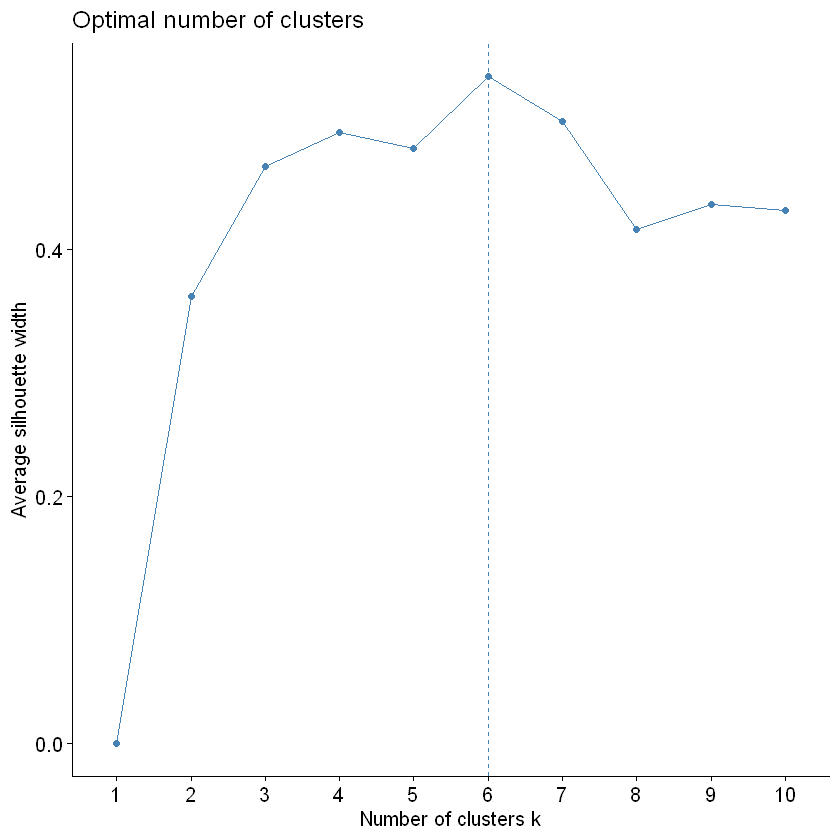

In [23]:
# Sprawdzenie jaką liczbę poziomów klasteryzacji zastosować
library(factoextra)
fviz_nbclust(mallcustomers_scaled, kmeans, method = "silhouette")
# Największa ąsrednia jest dla 6

In [24]:
### Klasteryzacja za pomoca funkcji kmeans()

library(stats)

set.seed(1234)

k_6 <- kmeans(mallcustomers_scaled, centers=6, nstart = 25)

In [25]:
# Liczba obserwacji w kazdym z klastrow
k_6$size

[1] 29 10 35 23 81 22

In [26]:
# Srodki kazdego z klastr?w
k_6$centers

,Income,SpendingScore
1,0.6850149,1.23811207
2,1.8709508,1.23143545
3,1.0523622,-1.28122394
4,-1.3042458,-1.13411939
5,-0.2004097,-0.02638995
6,-1.3262173,1.12934389


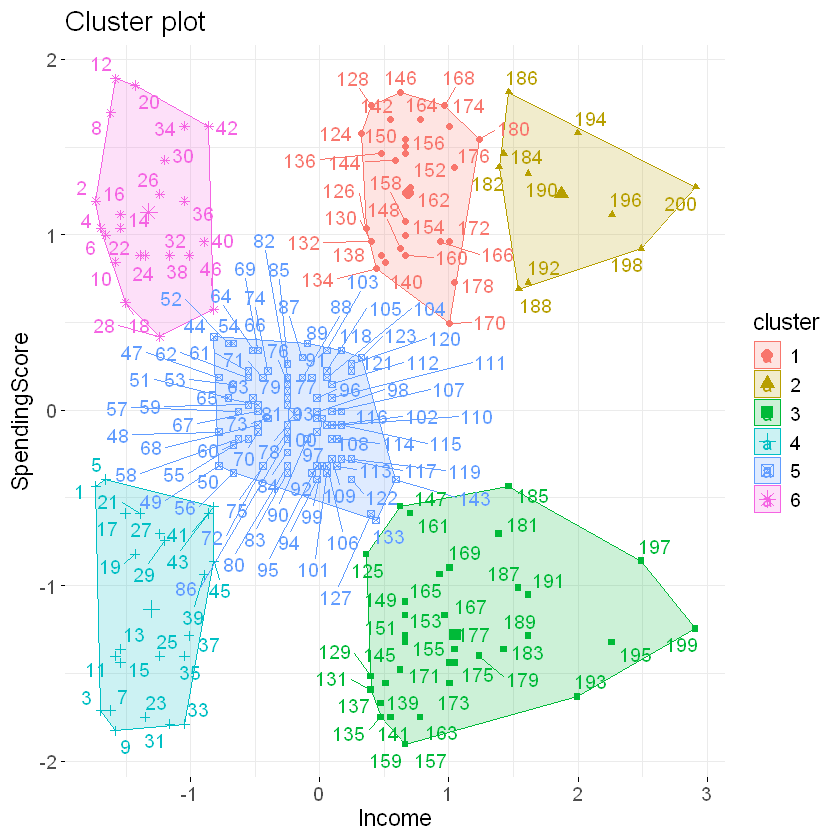

In [27]:
# Wizualizacja klasteryzacji za pomoca funkcji fviz_cluster() z pakietu factoextra
fviz_cluster(k_6, data = mallcustomers_scaled, repel = TRUE,
             ggtheme = theme_minimal()) + theme(text = element_text(size = 14))

In [28]:
# Generowanie srednich wartosci dla kazdego z wybranych atrybutow
mallcustomers %>%
  mutate(cluster = k_6$cluster) %>%
  select(cluster,
         Gender_Male,
         Gender_Female,
         Age,
         Income,
         SpendingScore) %>%
  group_by(cluster) %>%
  summarise_all("mean") %>%
  arrange(Age)

cluster,Gender_Male,Gender_Female,Age,Income,SpendingScore
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,0.4090909,0.5909091,25.27273,25727.27,79.36364
2,0.4000000,0.6000000,32.20000,109700.00,82.00000
1,0.4827586,0.5172414,32.86207,78551.72,82.17241
3,0.5428571,0.4571429,41.11429,88200.00,17.11429
5,0.4074074,0.5925926,42.71605,55296.30,49.51852
4,0.3913043,0.6086957,45.21739,26304.35,20.91304


In [29]:
# WNIOSKI:
# - im młodsze osoby tym większy SpendingScore
# - najmłodsi i najstarsi mają skrajnie różny SpendingScore
# - najmłodszi i najstarsi mają najniższe docohdy
# - największy średni income ma klaster 2
# - największy średni wieki ma klaster 1
# - największy średni SpendingScore ma klaster 6
# - w klastrze drugim jako jedynym istnieje przewaga kobiet i mężczyzn